In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


In [154]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [155]:
df = pd.read_csv("/home/bench/Documents/projects/ML-zoomcamp-Homework/ML_project/ad_10000records.csv")


In [156]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [157]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [158]:
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,gender,country,timestamp,clicked_on_ad
0,62.26,32.0,69481.85,172.83,decentralized_real-time_circuit,lisafort,male,svalbard_&_jan_mayen_islands,2016-06-09_21:43:05,0
1,41.73,31.0,61840.26,207.17,optional_full-range_projection,west_angelabury,male,singapore,2016-01-16_17:56:05,0
2,44.40,30.0,57877.15,172.83,total_5thgeneration_standardization,reyesfurt,female,guadeloupe,2016-06-29_10:50:45,0
3,59.88,28.0,56180.93,207.17,balanced_empowering_success,new_michael,female,zambia,2016-06-21_14:32:32,0
4,49.21,30.0,54324.73,201.58,total_5thgeneration_standardization,west_richard,female,qatar,2016-07-21_10:54:35,1


In [159]:
# Inspect the dataset
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
    daily_time_spent_on_site   age  area_income  daily_internet_usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         ad_topic_line             city  gender  \
0      decentralized_real-time_circuit         lisafort    male   
1       optional_full-range_projection  west_angelabury    male   
2  total_5thgeneration_standardization        reyesfurt  female   
3          balanced_empowering_success      new_michael  female   
4  total_5thgeneration_standardization     west_richard  female   

                        country            timestamp  clicked_on_ad  
0  svalbard_&_jan_mayen_islands  2016-06-09_21:43:05              0  
1        

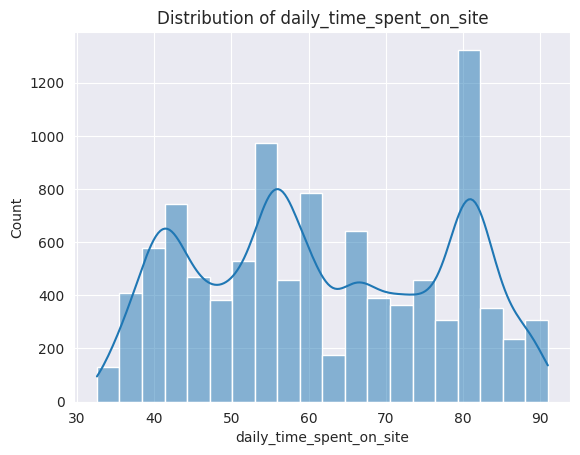

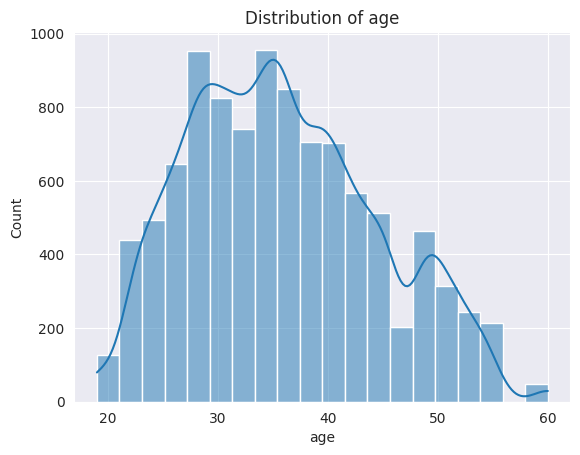

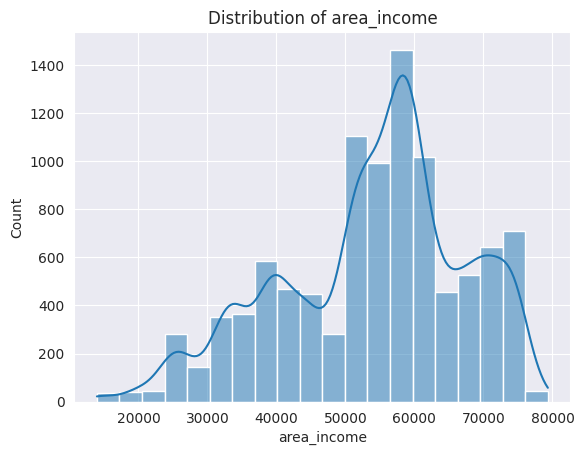

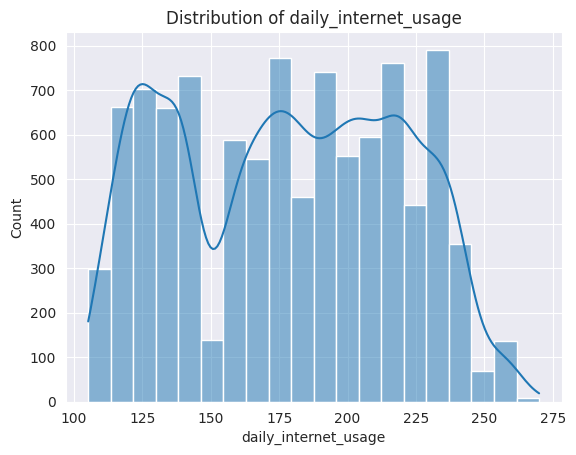

In [160]:
# Distribution of numerical columns
numerical_columns = ['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage']
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

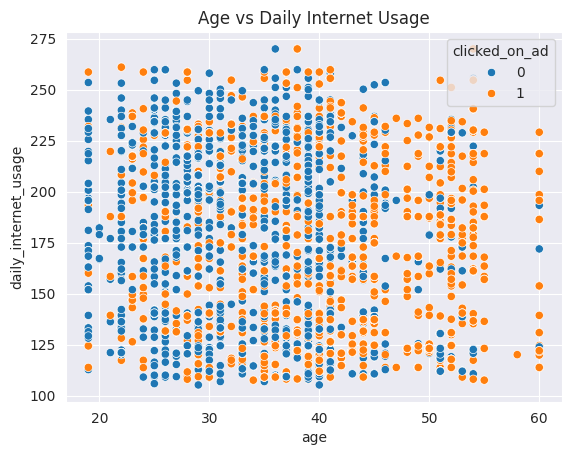

In [161]:
# Scatterplot: Age vs Daily Internet Usage
sns.scatterplot(x='age', y='daily_internet_usage', hue='clicked_on_ad', data=df)
plt.title("Age vs Daily Internet Usage")
plt.show()

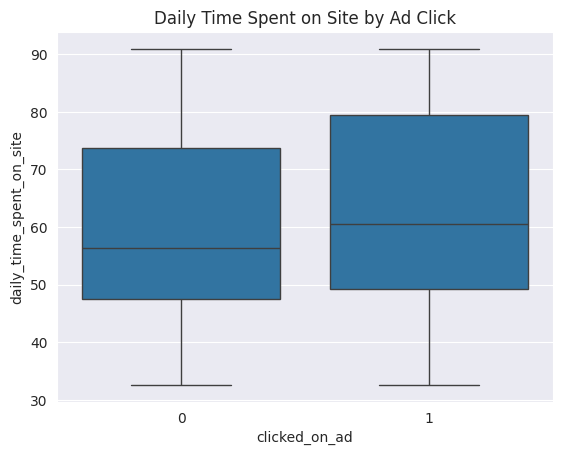

In [162]:

# Boxplot: Daily time spent on site by Clicked on Ad
sns.boxplot(x='clicked_on_ad', y='daily_time_spent_on_site', data=df)
plt.title("Daily Time Spent on Site by Ad Click")
plt.show()

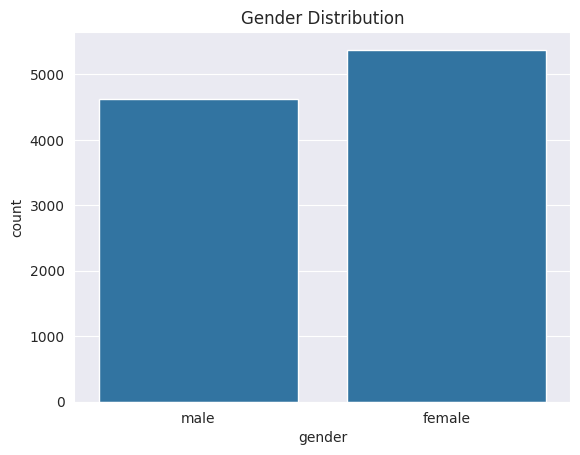

In [163]:

# Countplot for 'gender'
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

/tmp/ipykernel_401823/4225959640.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


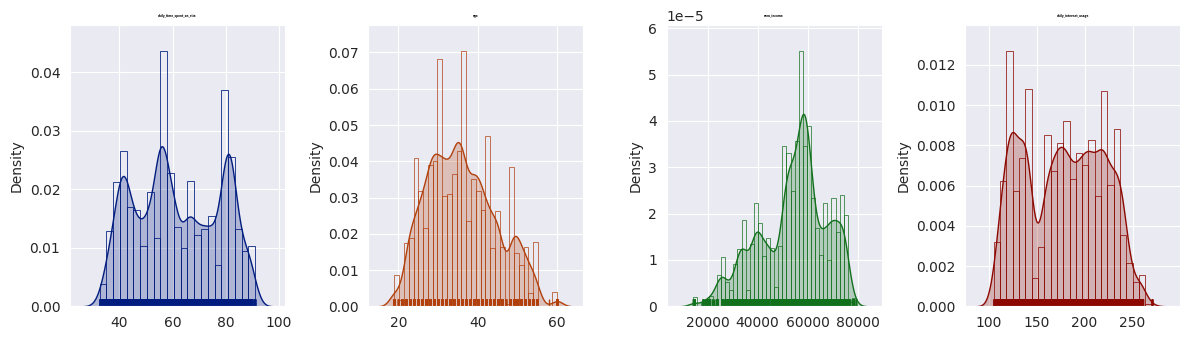

In [164]:
sns.set_style(style = "darkgrid")
colors = sns.color_palette(palette = 'dark', n_colors = 4)

numerical_columns = ['daily_time_spent_on_site', 
                      'age', 
                      'area_income', 
                      'daily_internet_usage']

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3.5))
axs = axs.flat

for i,col in enumerate(numerical_columns):
    sns.histplot(df, x = col, stat = 'density', color = colors[i], fill = False, ax = axs[i])
    sns.rugplot(df, x = col, color = colors[i], ax = axs[i])
    sns.kdeplot(df, x = col, color = colors[i], fill = True, ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(f"{col}", fontsize = 2, fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()

In [ ]:
g = sns.PairGrid(df[numerical_columns], palette = "dark")
g.map_lower(sns.scatterplot, size = 3, color = 'blue')
g.map_diag(sns.histplot, 
           color = 'green', 
           fill = False, 
           kde = True)
g.map_upper(sns.kdeplot, fill = True, cmap = 'mako')
g.fig.show()

/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palett

In [103]:
X = df.drop("clicked_on_ad", axis = 1)
y = df["clicked_on_ad"]

In [104]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
gender                      0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64


In [105]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split as tts

# Define constants
SEED = 1234
TEST_SIZE = 0.2

# Split the dataset
X_train, X_test, y_train, y_test = tts(X, 
                                       y, 
                                       test_size=TEST_SIZE, 
                                       random_state=SEED)

# Display the size of the training and testing sets
print(f"X_train: {len(X_train)} samples")
print(f"X_test: {len(X_test)} samples")
print(f"y_train: {len(y_train)} labels")
print(f"y_test: {len(y_test)} labels")


X_train: 8000 samples
X_test: 2000 samples
y_train: 8000 labels
y_test: 2000 labels


In [107]:
from collections import Counter
print(f"Target variable train: {Counter(y_train)}\n")
print(f"Target variable test: {Counter(y_test)}")


Target variable train: Counter({0: 4089, 1: 3911})

Target variable test: Counter({1: 1006, 0: 994})


In [108]:
from sklearn.model_selection import train_test_split

SEED = 1234
TEST_SIZE = 0.2

X = df.drop(columns=['clicked_on_ad'])
y = df['clicked_on_ad']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

# Print the split sizes
print(f"X_train: {len(X_train)} samples")
print(f"X_test: {len(X_test)} samples")


X_train: 8000 samples
X_test: 2000 samples


In [ ]:
X = data_encoded.drop(columns=['clicked_on_ad'])  # Features
y = data_encoded['clicked_on_ad']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (8000, 1295), Testing set: (2000, 1295)


In [126]:
# One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(df, columns=['ad_topic_line', 'gender', 'city', 'country'], drop_first=True)

# Separate features and target variable
X = data_encoded.drop(columns=['clicked_on_ad'])
y = data_encoded['clicked_on_ad']


In [128]:
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,gender,country,clicked_on_ad,year,month,day,hour,minute,second
0,62.26,32.0,69481.85,172.83,decentralized_real-time_circuit,lisafort,male,svalbard_&_jan_mayen_islands,0,NaN,NaN,NaN,NaN,NaN,NaN
1,41.73,31.0,61840.26,207.17,optional_full-range_projection,west_angelabury,male,singapore,0,NaN,NaN,NaN,NaN,NaN,NaN
2,44.40,30.0,57877.15,172.83,total_5thgeneration_standardization,reyesfurt,female,guadeloupe,0,NaN,NaN,NaN,NaN,NaN,NaN
3,59.88,28.0,56180.93,207.17,balanced_empowering_success,new_michael,female,zambia,0,NaN,NaN,NaN,NaN,NaN,NaN
4,49.21,30.0,54324.73,201.58,total_5thgeneration_standardization,west_richard,female,qatar,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,profound_executive_flexibility,west_angelabury,male,singapore,1,NaN,NaN,NaN,NaN,NaN,NaN
9996,41.73,28.0,51501.38,120.49,managed_zero_tolerance_concept,kennedyfurt,male,luxembourg,0,NaN,NaN,NaN,NaN,NaN,NaN
9997,55.60,39.0,38067.08,124.44,intuitive_exuding_service-desk,north_randy,female,egypt,0,NaN,NaN,NaN,NaN,NaN,NaN
9998,46.61,50.0,43974.49,123.13,realigned_content-based_leverage,north_samantha,female,malawi,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 1234
TEST_SIZE = 0.2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

# Print the split sizes
print(f"X_train: {len(X_train)} samples")
print(f"X_test: {len(X_test)} samples")


X_train: 8000 samples
X_test: 2000 samples


In [112]:
# Assuming the datetime column is called 'datetime_column'
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Extract features like year, month, day, hour, etc.
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Drop the original datetime column after extraction
df.drop(columns=['timestamp'], inplace=True)


/tmp/ipykernel_401823/2002345224.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [113]:
# One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(df, columns=['ad_topic_line', 'gender', 'city', 'country'], drop_first=True)


In [ ]:
# Check for missing values in the dataset
print(data_encoded.isna().sum())
# Fill numerical columns with the median value
data_encoded.fillna(data_encoded.median(), inplace=True)

# Fill categorical columns with the mode (most frequent value)
for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col].fillna(data_encoded[col].mode()[0], inplace=True)


daily_time_spent_on_site     0
age                          0
area_income                  0
daily_internet_usage         0
clicked_on_ad                0
                            ..
country_wallis_and_futuna    0
country_western_sahara       0
country_yemen                0
country_zambia               0
country_zimbabwe             0
Length: 1296, dtype: int64


In [115]:
# Drop rows with missing values
data_encoded.dropna(inplace=True)


In [124]:
print(data_encoded.shape)  # Check the number of rows and columns


(0, 1296)


In [133]:
df.fillna(method='ffill', inplace=True)  # Or another strategy


/tmp/ipykernel_401823/877569123.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Or another strategy


In [137]:
print(data_encoded.shape)  # Check the number of rows and columns


(10000, 1296)


In [138]:
# Count missing values per column
nan_counts = np.sum(np.isnan(X_train), axis=0)
print(f"Columns with NaN values: {np.sum(nan_counts > 0)} / {X_train.shape[1]}")

# Optional: Display columns with NaNs and their counts
print({i: count for i, count in enumerate(nan_counts) if count > 0})


Columns with NaN values: 6 / 1295
{4: 8000, 5: 8000, 6: 8000, 7: 8000, 8: 8000, 9: 8000}


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Replace "mean" with "median" if needed
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['year' 'month' 'day' 'hour' 'minute' 'second']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['year' 'month' 'day' 'hour' 'minute' 'second']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [141]:
print(np.isnan(X_train).any())  # Should be False


False


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.7800


/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models that benefit from scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [150]:
df.fillna(method='ffill', inplace=True)  # Or another strategy


/tmp/ipykernel_401823/877569123.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Or another strategy


In [151]:
# Count missing values per column
nan_counts = np.sum(np.isnan(X_train), axis=0)
print(f"Columns with NaN values: {np.sum(nan_counts > 0)} / {X_train.shape[1]}")

# Optional: Display columns with NaNs and their counts
print({i: count for i, count in enumerate(nan_counts) if count > 0})


Columns with NaN values: 6 / 1295
{4: 8000, 5: 8000, 6: 8000, 7: 8000, 8: 8000, 9: 8000}


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Support Vector Machine (SVM)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Print results
for model_name, acc in results.items():
    print(f"{model_name}: Accuracy = {acc:.4f}")


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values